In [166]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [167]:
data = pd.read_csv('/Users/kb/Ironhack/Labs/lab-cleaning-numerical-data/files_for_lab/marketing_customer_value_analysis.csv')
data.shape

(9134, 24)

In [168]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [170]:
data.columns=[w.replace(' ','_').lower() for w in data.columns]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [171]:
input='ThisIsCamelCase'
import re
re.findall('[A-Z][a-z]+',input)

['This', 'Is', 'Camel', 'Case']

In [172]:
'_'.join(re.findall('[A-Z][a-z]+',input)).lower()

'this_is_camel_case'

In [173]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'],errors='coerce')

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [175]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [176]:
data['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [177]:
num =data.select_dtypes(np.number)

In [178]:
data['number_of_open_complaints'].nunique()

6

In [179]:
cont=[]
disc=[]
for i in num.columns:
    if data[i].nunique()/len(data)<.015:
        disc.append(i)
    else:
        cont.append(i)
print(cont)
print(disc)


['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


In [180]:
continuous=data[cont]
continuous.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


In [181]:
discrete=data[disc]
discrete.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [182]:
for i in discrete.columns:
    print(discrete[i].value_counts())

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64
59    142
61    128
50    125
44    115
10    114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64


In [183]:
categorical=data.select_dtypes(np.object)

In [184]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [185]:
for i in categorical.columns:
    print(i, categorical[i].nunique())

customer 9134
state 5
response 2
coverage 3
education 5
employmentstatus 5
gender 2
location_code 3
marital_status 3
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
vehicle_class 6
vehicle_size 3


In [186]:
categorical=data.drop(['customer'], axis=1)

customer_lifetime_value


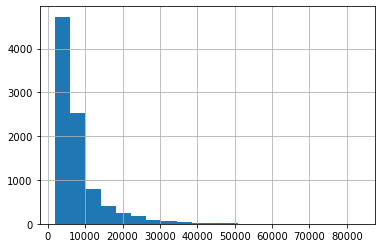

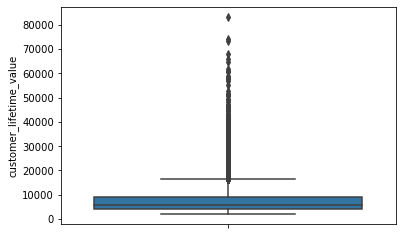

income


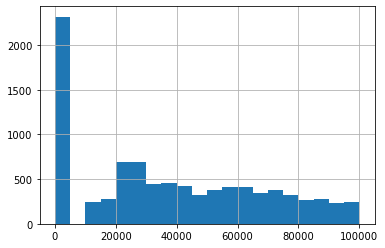

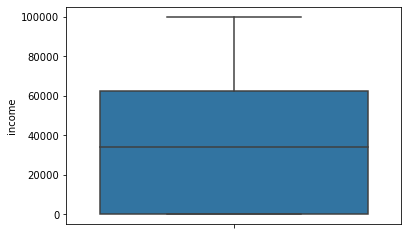

monthly_premium_auto


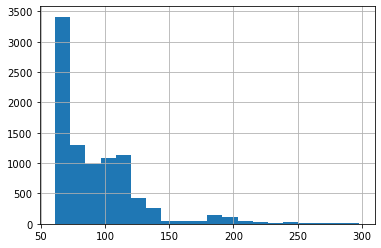

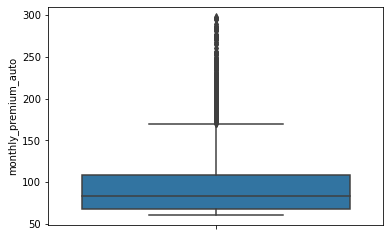

total_claim_amount


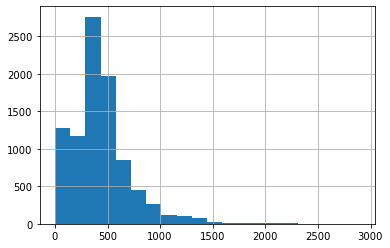

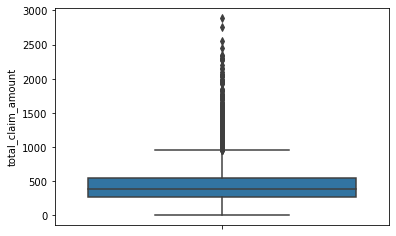

In [187]:
for i in continuous.columns:
    print(i)
    continuous[i].hist(bins=20)
    plt.show()
    sns.boxplot(y=continuous[i])
    plt.show()

In [163]:
data=data[data['customer_lifetime_value']<45000]

In [164]:
data=data[data['monthly_premium_auto']<259]

In [165]:
data=data[data['total_claim_amount']<1750]

In [107]:
data.shape

(9038, 24)

In [188]:
continuous=data[cont]
discrete=data[disc]
categorical=data.select_dtypes(np.object)
categorical=data.drop(['customer'], axis=1)


customer_lifetime_value


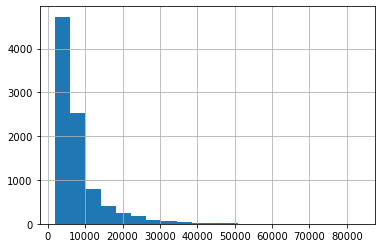

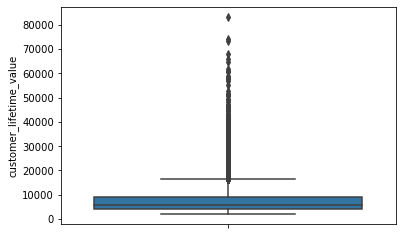

income


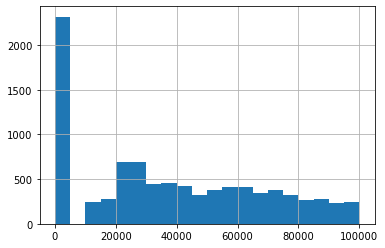

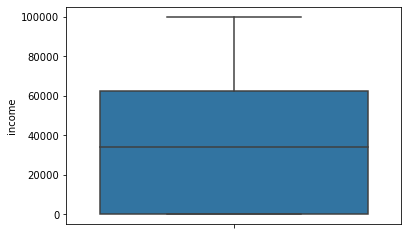

monthly_premium_auto


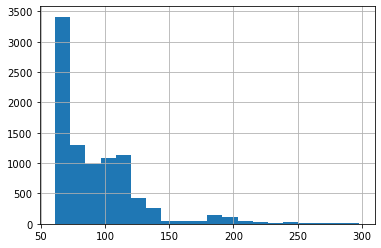

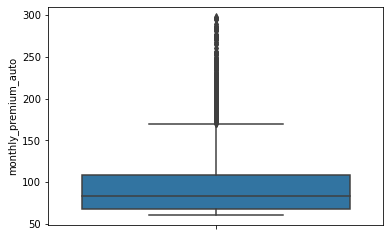

total_claim_amount


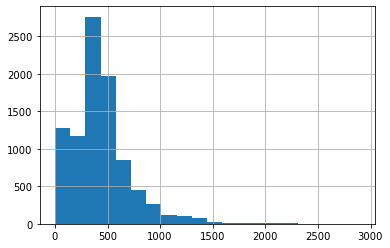

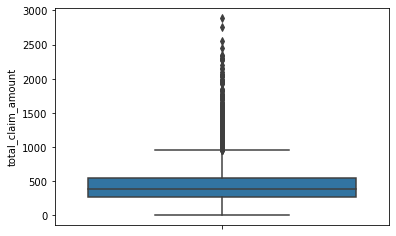

In [189]:
for i in continuous.columns:
    print(i)
    continuous[i].hist(bins=20)
    plt.show()
    sns.boxplot(y=continuous[i])
    plt.show()

# Cleaning Categorical Data

### Plot a correlation matrix, what can you see?

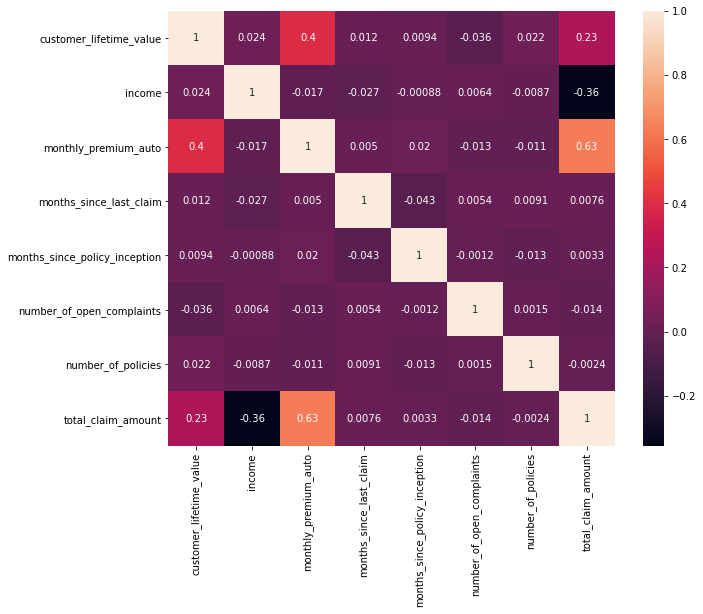

In [190]:
#the correlation matrix indicats our x variables dont suffer from multicolinearity
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

months_since_last_claim


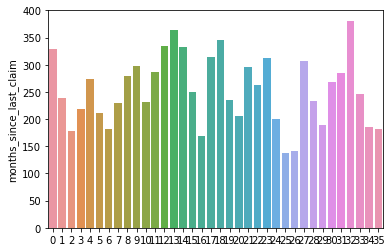

months_since_policy_inception


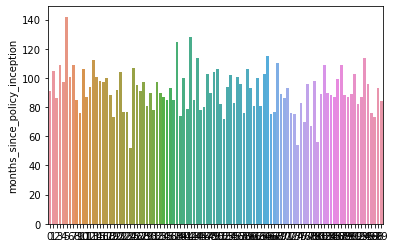

number_of_open_complaints


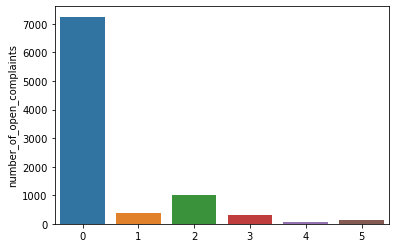

number_of_policies


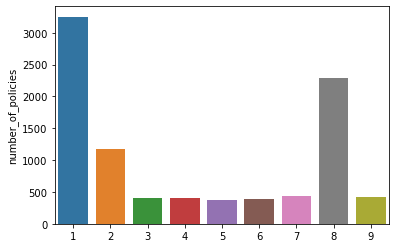

In [191]:
for i in discrete.columns:
    print(i)
    sns.barplot( x=discrete[i].unique(), y=discrete[i].value_counts(), data=discrete)
    plt.show()

customer_lifetime_value


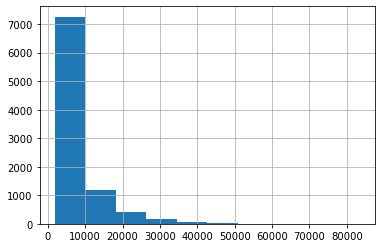

income


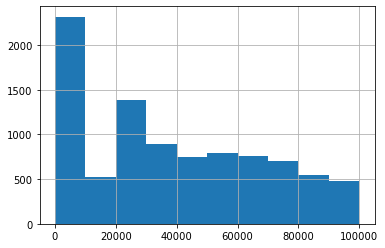

monthly_premium_auto


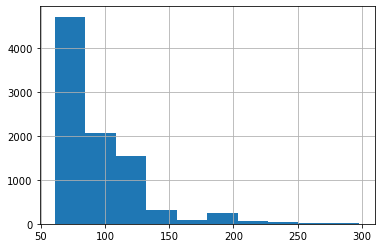

total_claim_amount


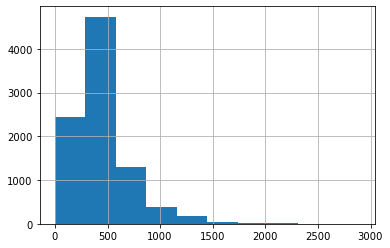

In [192]:
for i in continuous.columns:
    print(i)
    continuous[i].hist()
    plt.show()

### What can you see in the plots?

In [193]:
# the continuous charts may need some log cleaning to be normal distribution
# the discrete data could benefit from being grouped

### Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

customer_lifetime_value


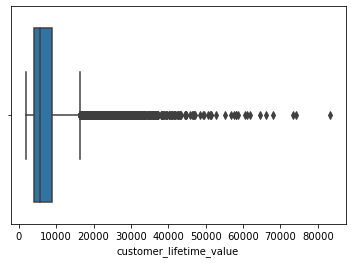

income


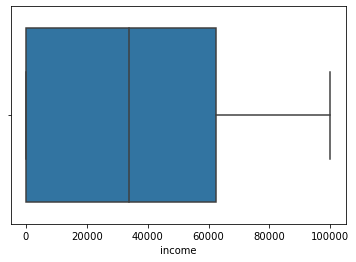

monthly_premium_auto


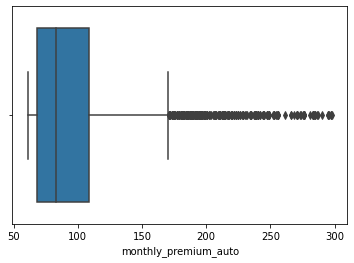

total_claim_amount


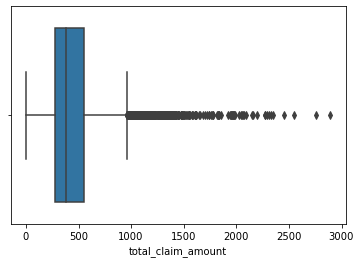

In [194]:
for i in continuous.columns:
    print(i)
    sns.boxplot(continuous[i])
    plt.show()

### Have you found outliers? If you have, what should we do with them?

In [195]:
var_char={}
for i in data.columns:
    if i in list(continuous.columns):
        iqr = np.percentile(data[i],75)-np.percentile(data[i],25)
        var_char['upperlimit'+str(i)]=np.percentile(data[i],75)+iqr*3
        var_char['lowerlimit'+str(i)]=np.percentile(data[i],25)-iqr*3
        print(i, iqr, var_char['upperlimit'+str(i)], var_char['lowerlimit'+str(i)], data.shape)

customer_lifetime_value 4967.915247000001 23865.91278225 -10909.493946750003 (9134, 24)
income 62320.0 249280.0 -186960.0 (9134, 24)
monthly_premium_auto 41.0 232.0 -55.0 (9134, 24)
total_claim_amount 275.25659425 1373.2846215 -553.5115382499998 (9134, 24)


In [35]:
for i in data.columns:
    if i in list(continuous.columns):
        if var_char['upperlimit'+str(i)] != var_char['lowerlimit'+str(i)]:
            data=data[(data[i]>var_char['lowerlimit'+str(i)]) & (data[i]<var_char['upperlimit'+str(i)])]
        print(i, iqr, var_char['upperlimit'+str(i)], var_char['lowerlimit'+str(i)], data.shape)

customer_lifetime_value 273.24924325 23486.87855475 -10677.13706175 (8693, 24)
income 273.24924325 249786.0 -187339.5 (8693, 24)
monthly_premium_auto 273.24924325 228.0 -52.0 (8663, 24)
total_claim_amount 273.24924325 1362.14772975 -550.5969729999999 (8599, 24)


In [36]:
continuous=data[list(continuous.columns)]
discrete=data[list(discrete.columns)]

In [37]:
categorical=data.select_dtypes(np.object)
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


customer_lifetime_value


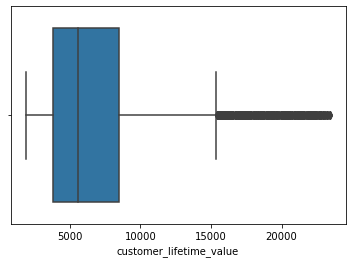

income


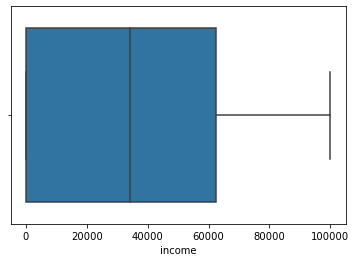

monthly_premium_auto


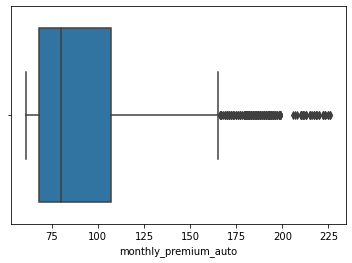

total_claim_amount


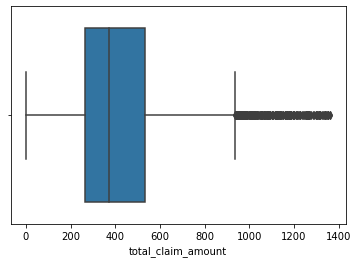

In [38]:
for i in continuous.columns:
    print(i)
    sns.boxplot(continuous[i])
    plt.show()

### Check nan values per column.

In [196]:
data.isna().sum()/len(data)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

### For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

In [200]:
categorical=data.select_dtypes(np.object)
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [201]:
categorical=categorical.drop(['customer'], axis=1)

In [231]:
data=data.drop(['customer'], axis=1)

In [202]:
categorical.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

state


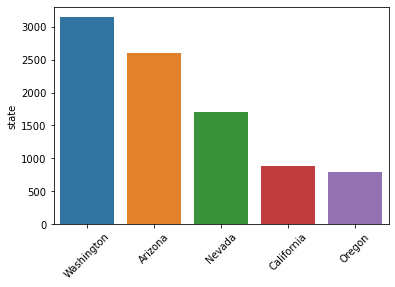

response


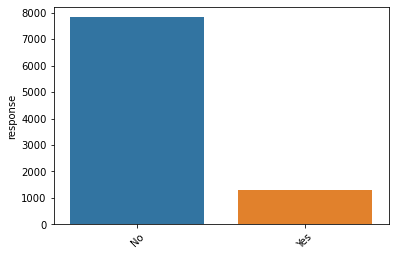

coverage


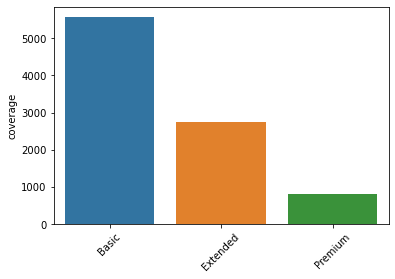

education


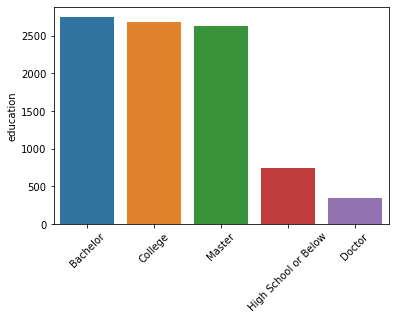

employmentstatus


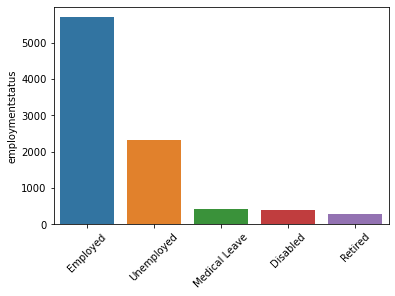

gender


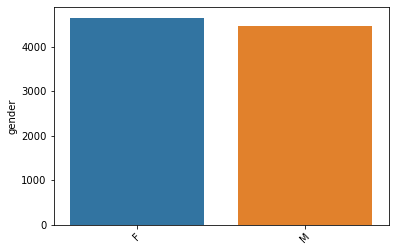

location_code


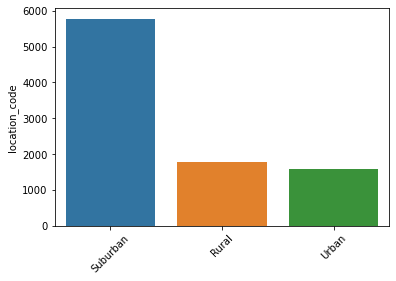

marital_status


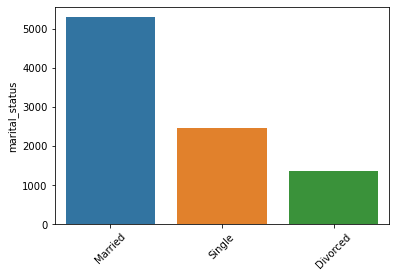

policy_type


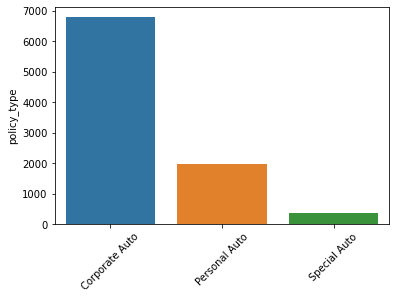

policy


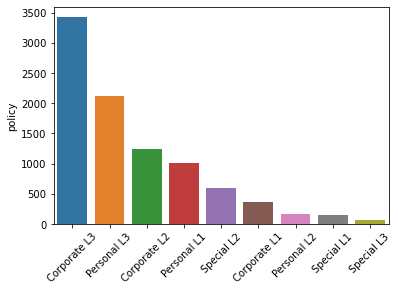

renew_offer_type


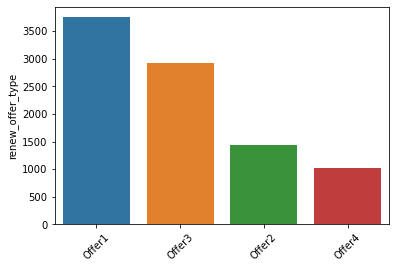

sales_channel


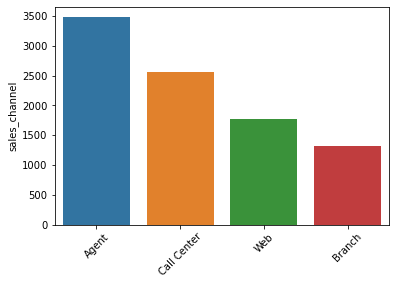

vehicle_class


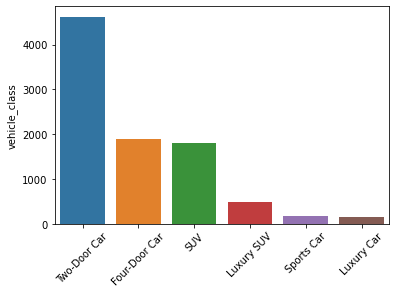

vehicle_size


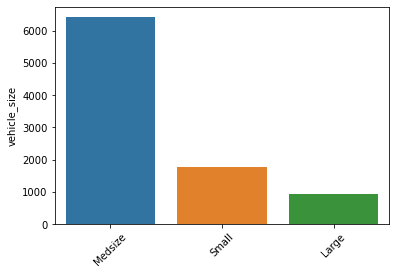

In [203]:
for i in categorical.columns:
    print(i)
    sns.barplot( x=categorical[i].unique(), y=categorical[i].value_counts(), data=categorical)
    plt.xticks(rotation=45)
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Corporate L3'),
  Text(1, 0, 'Personal L3'),
  Text(2, 0, 'Corporate L2'),
  Text(3, 0, 'Personal L1'),
  Text(4, 0, 'Special L2'),
  Text(5, 0, 'Corporate L1'),
  Text(6, 0, 'Personal L2'),
  Text(7, 0, 'Special L1'),
  Text(8, 0, 'Special L3')])

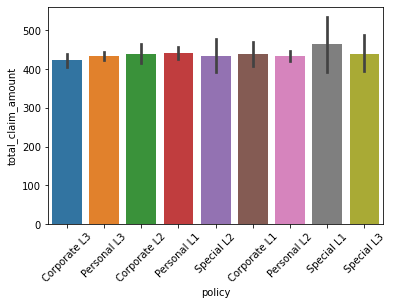

In [204]:
chart = sns.barplot(x='policy',y='total_claim_amount', data=data)
plt.xticks(rotation=45)

In [205]:
def clean_policy(x):
    if x.endswith("L3"):
        return "L3"
    elif x.endswith("L2"):
        return "L2"
    else:
        return "L1"

In [206]:
data['policy1']=list(map(clean_policy, data['policy']))

In [207]:
data['policy1'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy1, dtype: int64

(array([0, 1, 2]), [Text(0, 0, 'L3'), Text(1, 0, 'L2'), Text(2, 0, 'L1')])

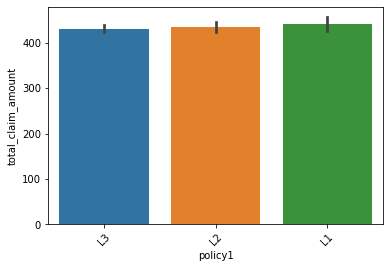

In [208]:
chart = sns.barplot(x='policy1',y='total_claim_amount', data=data)
plt.xticks(rotation=45)

In [209]:
def clean_policy(x):
    if x.startswith("Corporate"):
        return "Corporate"
    elif x.startswith("Personal"):
        return "Personal"
    else:
        return "Special"

In [210]:
data['policy1']=list(map(clean_policy, data['policy']))

In [211]:
data['policy1'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy1, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Corporate'), Text(1, 0, 'Personal'), Text(2, 0, 'Special')])

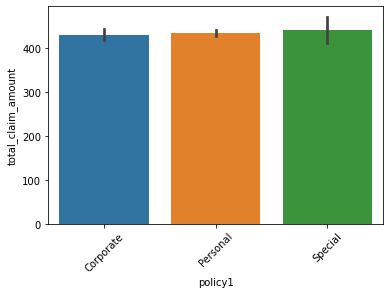

In [212]:
chart = sns.barplot(x='policy1',y='total_claim_amount', data=data)
plt.xticks(rotation=45)

In [213]:
def clean_policy(x):
    if "Corporate" in x:
        return "Corporate"
    elif "Personal" in x:
        return "Personal"
    else:
        return "Special"

In [214]:
data['policy1']=list(map(clean_policy, data['policy']))

In [215]:
data['policy1'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy1, dtype: int64

# Feature Extraction

### Open the categoricals variable we created before.


In [216]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy1
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Corporate
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Personal
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Personal
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Corporate
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Personal


### Plot all the categorical variables with the proper plot. What can you see?

state


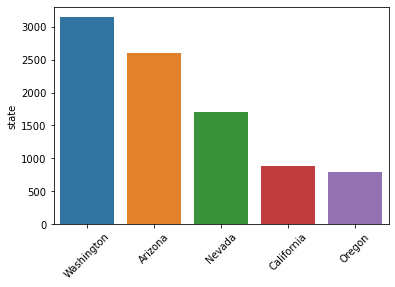

response


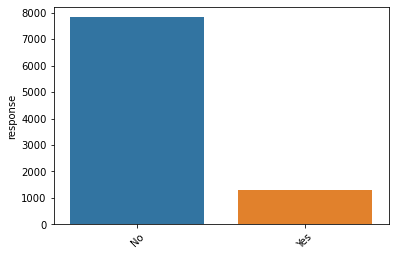

coverage


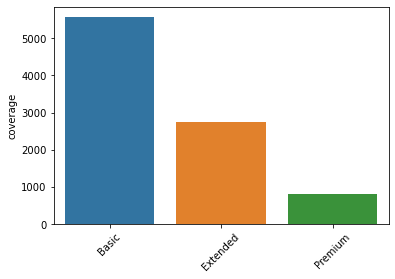

education


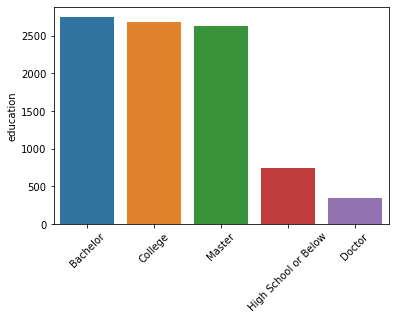

employmentstatus


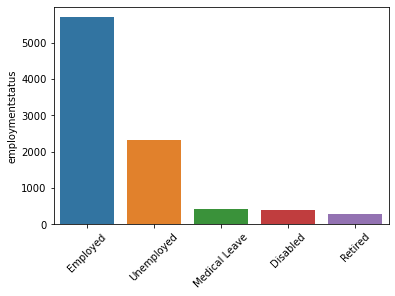

gender


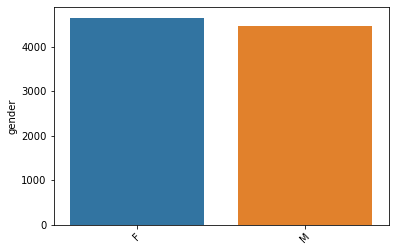

location_code


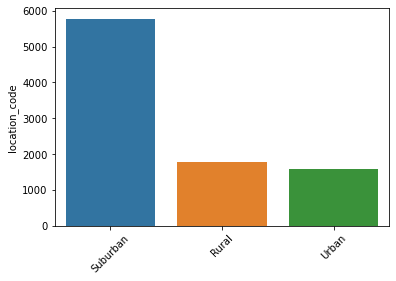

marital_status


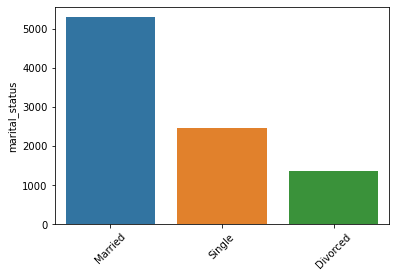

policy_type


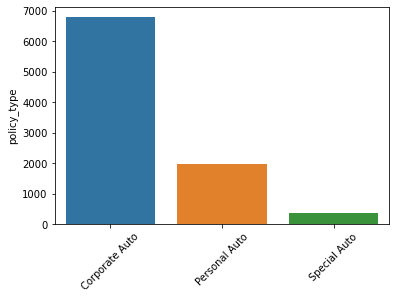

policy


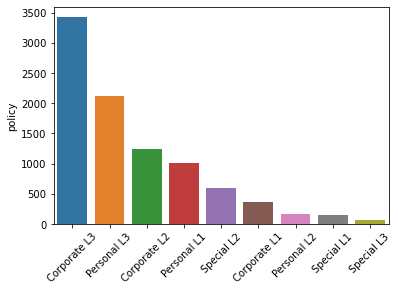

renew_offer_type


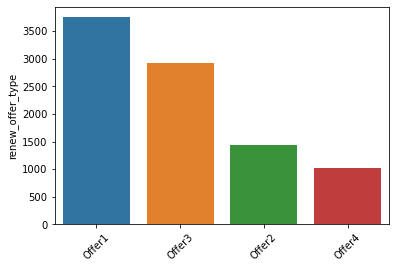

sales_channel


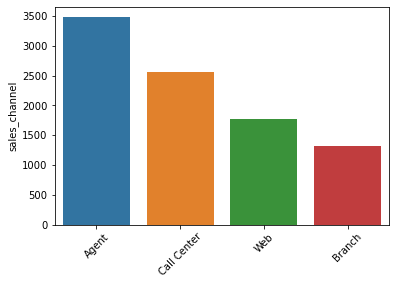

vehicle_class


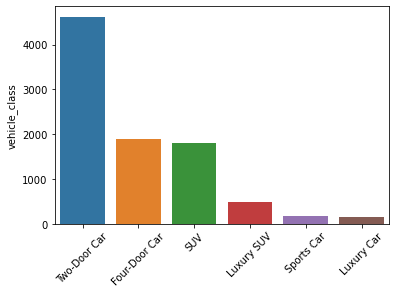

vehicle_size


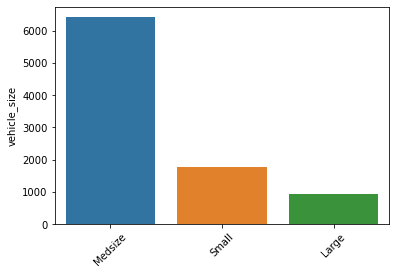

In [217]:
for i in categorical.columns:
    print(i)
    sns.barplot( x=categorical[i].unique(), y=categorical[i].value_counts(), data=categorical)
    plt.xticks(rotation=45)
    plt.show()

state


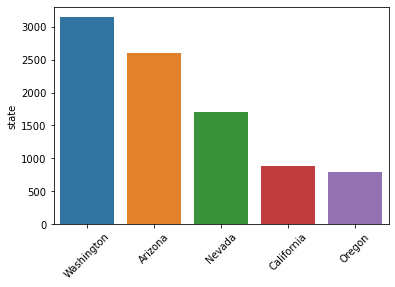

response


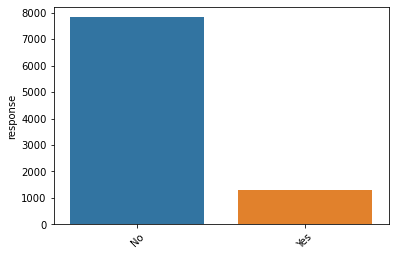

coverage


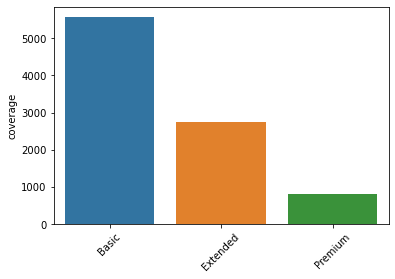

education


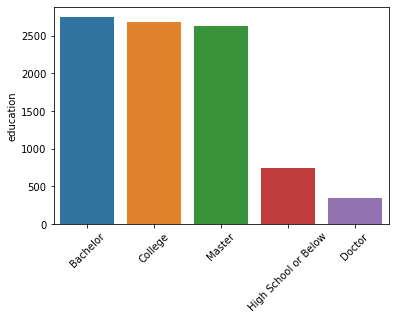

employmentstatus


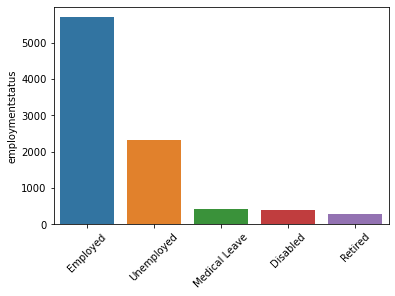

gender


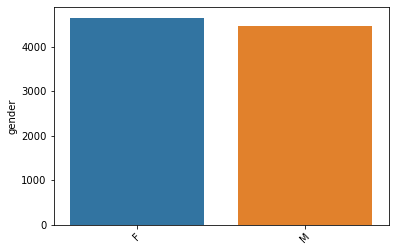

location_code


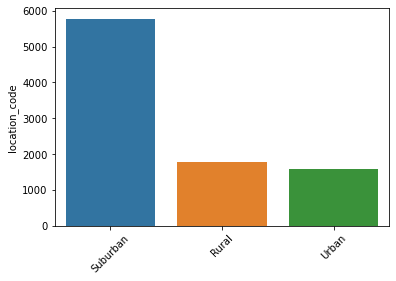

marital_status


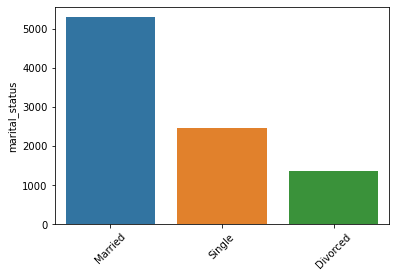

policy_type


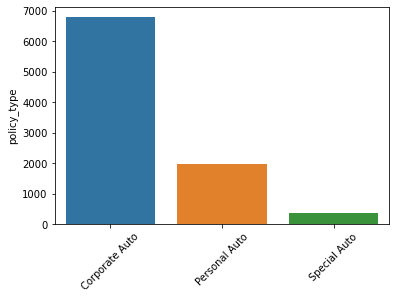

policy


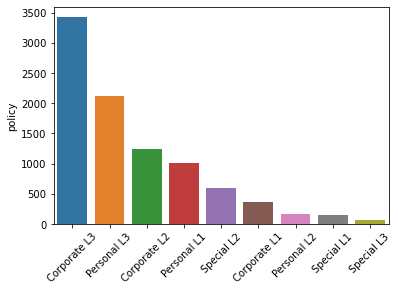

renew_offer_type


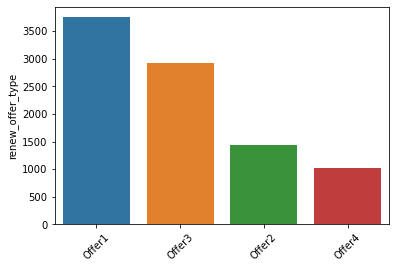

sales_channel


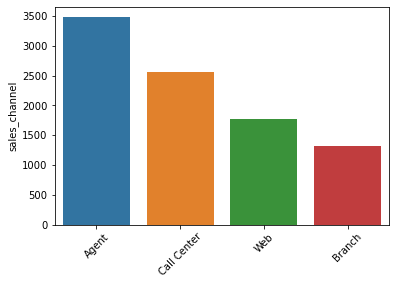

vehicle_class


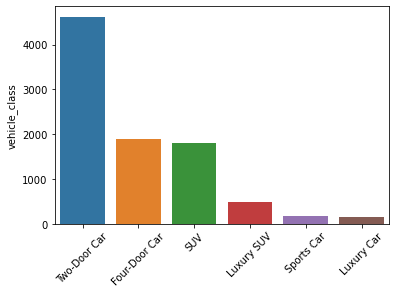

vehicle_size


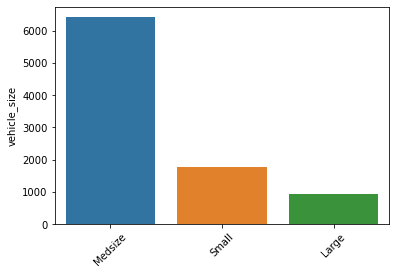

In [218]:
for i in categorical.columns:
    print(i)
    sns.barplot( x=categorical[i].unique(), y=categorical[i].value_counts(), data=categorical)
    plt.xticks(rotation=45)
    plt.show()

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [219]:
def clean_policy(x):
    if "L3" in x:
        return "L3"
    elif "L2" in x:
        return "L2"
    else:
        return "L1"

In [220]:
data['policy1']=list(map(clean_policy, data['policy']))

In [221]:
data['policy1'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy1, dtype: int64

### Plot time variable. Can you extract something from it?

In [222]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'],format='%Y%m%d', errors='coerce')

In [223]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy1
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,L3
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,L3
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,L3
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,L2
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,L1


In [224]:
data['effective_to_month'] = pd.DatetimeIndex(data['effective_to_date']).month

In [225]:
data['effective_to_month'].value_counts()

1    4898
2    4236
Name: effective_to_month, dtype: int64

In [226]:
data['effective_to_year'] = pd.DatetimeIndex(data['effective_to_date']).year

In [227]:
data['effective_to_year'].value_counts()

2011    9134
Name: effective_to_year, dtype: int64

In [228]:
import datetime as dt

In [229]:
data['effective_to_year'] = data['effective_to_date'].dt.year

In [230]:
data['effective_to_year'].value_counts()

2011    9134
Name: effective_to_year, dtype: int64

# Data cleaning and wrangling

### We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [234]:
var_char={}
for i in data.columns:
    if i in continuous.columns:
        var_char['iqr'+str(i)] = np.percentile(continuous[i],75)-np.percentile(continuous[i],25)
        var_char['upperlimit'+str(i)]=np.percentile(continuous[i],75)+var_char['iqr'+str(i)]*1.5
        var_char['lowerlimit'+str(i)]=np.percentile(continuous[i],25)-var_char['iqr'+str(i)]*1.5
        print(i,"- ", 'iqr: ', var_char['iqr'+str(i)], 'upperlimit: ', var_char['upperlimit'+str(i)], 'lowerlimit: ', var_char['lowerlimit'+str(i)], data.shape, "\n\n")
        
        

customer_lifetime_value -  iqr:  4967.915247000001 upperlimit:  16414.039911750002 lowerlimit:  -3457.6210762500014 (9134, 26) 


income -  iqr:  62320.0 upperlimit:  155800.0 lowerlimit:  -93480.0 (9134, 26) 


monthly_premium_auto -  iqr:  41.0 upperlimit:  170.5 lowerlimit:  6.5 (9134, 26) 


total_claim_amount -  iqr:  275.25659425 upperlimit:  960.3997301249999 lowerlimit:  -140.62664687499995 (9134, 26) 




In [235]:
for i in data.columns:
    if i in continuous.columns:
        data=data[(data[i]<var_char['upperlimit'+str(i)]) & (data[i]>var_char['lowerlimit'+str(i)])]
        print(i,"- ", 'iqr: ', var_char['iqr'+str(i)], 'upperlimit: ', var_char['upperlimit'+str(i)], 'lowerlimit: ', var_char['lowerlimit'+str(i)], data.shape, "\n\n")

customer_lifetime_value -  iqr:  4967.915247000001 upperlimit:  16414.039911750002 lowerlimit:  -3457.6210762500014 (8317, 26) 


income -  iqr:  62320.0 upperlimit:  155800.0 lowerlimit:  -93480.0 (8317, 26) 


monthly_premium_auto -  iqr:  41.0 upperlimit:  170.5 lowerlimit:  6.5 (8033, 26) 


total_claim_amount -  iqr:  275.25659425 upperlimit:  960.3997301249999 lowerlimit:  -140.62664687499995 (7847, 26) 




In [239]:
continuous=data[cont]

customer_lifetime_value


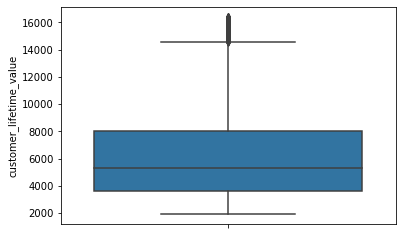

income


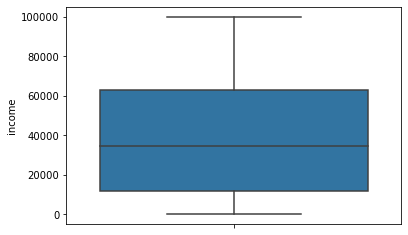

monthly_premium_auto


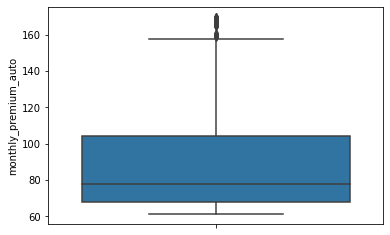

total_claim_amount


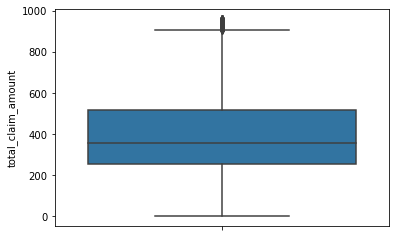

In [240]:
for i in continuous.columns:
    print(i)
    sns.boxplot(y=continuous[i])
    plt.show()

### Create a copy of the dataframe for the data wrangling.

In [246]:
xnum1 = continuous.copy()
xnum2 = continuous.copy()
xnum3 = continuous.copy()

In [248]:
xnum3.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
5,8256.297800,62902,69,159.383042


### Normalize the continuous variables. You can use any one method you want.

In [250]:
#normalized
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(xnum1)
xnormalized = transformer.transform(xnum1)
xnormalized = pd.DataFrame(xnormalized)

In [251]:
#standardized
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(xnum2)
xstandardized=transformer.transform(xnum2)
xstandardized=pd.DataFrame(xstandardized)

In [254]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(xnum3)
x_min_max = transformer.transform(xnum3)

In [297]:
#select normalization method
myx=xnormalized

### Encode the categorical variables

In [255]:
discrete.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [260]:
def policy_inception(x):
    x = round(x/12)
    return x

In [289]:
discrete['yrs_since_policy_inception']=list(map(policy_inception,discrete['months_since_policy_inception']))


KeyError: 'months_since_policy_inception'

In [290]:
data['yrs_since_policy_inception']=list(map(policy_inception,data['months_since_policy_inception']))

In [265]:
discrete=discrete.drop(['months_since_policy_inception'],axis=1)
discrete

KeyError: "['months_since_policy_inception'] not found in axis"

In [266]:
discrete

,months_since_last_claim,number_of_open_complaints,number_of_policies,yrs_since_policy_inception
0,32,0,1,0
1,13,0,8,4
2,18,0,2,3
3,18,0,7,5
4,12,0,1,4
...,...,...,...,...
9129,18,0,2,7
9130,14,0,1,2
9131,9,3,2,3
9132,34,0,3,0


In [282]:
discrete['yrs_since_last_claim']=list(map(policy_inception,discrete['months_since_last_claim']))
data['yrs_since_last_claim']=list(map(policy_inception,data['months_since_last_claim']))

In [268]:
discrete=discrete.drop(['yrs_since_last_claim'],axis=1)
discrete

,months_since_last_claim,number_of_open_complaints,number_of_policies,yrs_since_policy_inception
0,32,0,1,0
1,13,0,8,4
2,18,0,2,3
3,18,0,7,5
4,12,0,1,4
...,...,...,...,...
9129,18,0,2,7
9130,14,0,1,2
9131,9,3,2,3
9132,34,0,3,0


In [284]:
ob=[]
for i in categorical.columns:
    ob.append(i)
    

In [285]:
for i in discrete.columns:
    ob.append(i)

In [286]:
ob

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'policy1',
 'months_since_last_claim',
 'number_of_open_complaints',
 'number_of_policies',
 'yrs_since_policy_inception',
 'yrs_since_last_claim']

In [292]:
obs=data[ob]

In [291]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy1,effective_to_month,effective_to_year,yrs_since_last_claim,yrs_since_policy_inception
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,L3,2,2011,3,0
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,L3,2,2011,2,3
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,L2,1,2011,2,5
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,L1,2,2011,1,4
5,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,L3,1,2011,1,8


In [293]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(handle_unknown='error').fit(obs)
encoded=encoder.transform(obs).toarray()
encoded=pd.DataFrame(encoded)
encoded.columns=encoder.get_feature_names()
encoded.columns

Index(['x0_Arizona', 'x0_California', 'x0_Nevada', 'x0_Oregon',
       'x0_Washington', 'x1_No', 'x1_Yes', 'x2_Basic', 'x2_Extended',
       'x2_Premium',
       ...
       'x18_3', 'x18_4', 'x18_5', 'x18_6', 'x18_7', 'x18_8', 'x19_0', 'x19_1',
       'x19_2', 'x19_3'],
      dtype='object', length=122)

### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [296]:
xcols=continuous.columns.append(encoded.columns)
continuous.columns
xcols

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'total_claim_amount', 'x0_Arizona', 'x0_California', 'x0_Nevada',
       'x0_Oregon', 'x0_Washington', 'x1_No',
       ...
       'x18_3', 'x18_4', 'x18_5', 'x18_6', 'x18_7', 'x18_8', 'x19_0', 'x19_1',
       'x19_2', 'x19_3'],
      dtype='object', length=126)

In [298]:
x = np.concatenate((myx, encoded), axis=1)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,0.049048,0.998772,0.001225,0.006830,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.255478,0.966747,0.002141,0.011230,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.997512,0.000000,0.013829,0.069131,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.064055,0.997940,0.001662,0.003145,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.130140,0.991492,0.001088,0.002512,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [299]:
x=pd.DataFrame(x)
x.columns=xcols
x.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,x3_Bachelor,x3_College,x3_Doctor,x3_High School or Below,x3_Master,x4_Disabled,x4_Employed,x4_Medical Leave,x4_Retired,x4_Unemployed,x5_F,x5_M,x6_Rural,x6_Suburban,x6_Urban,x7_Divorced,x7_Married,x7_Single,x8_Corporate Auto,x8_Personal Auto,x8_Special Auto,x9_Corporate L1,x9_Corporate L2,x9_Corporate L3,x9_Personal L1,x9_Personal L2,x9_Personal L3,x9_Special L1,x9_Special L2,x9_Special L3,x10_Offer1,x10_Offer2,x10_Offer3,x10_Offer4,x11_Agent,x11_Branch,x11_Call Center,x11_Web,x12_Four-Door Car,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small,x14_L1,x14_L2,x14_L3,x15_0,x15_1,x15_2,x15_3,x15_4,x15_5,x15_6,x15_7,x15_8,x15_9,x15_10,x15_11,x15_12,x15_13,x15_14,x15_15,x15_16,x15_17,x15_18,x15_19,x15_20,x15_21,x15_22,x15_23,x15_24,x15_25,x15_26,x15_27,x15_28,x15_29,x15_30,x15_31,x15_32,x15_33,x15_34,x15_35,x16_0,x16_1,x16_2,x16_3,x16_4,x16_5,x17_1,x17_2,x17_3,x17_4,x17_5,x17_6,x17_7,x17_8,x17_9,x18_0,x18_1,x18_2,x18_3,x18_4,x18_5,x18_6,x18_7,x18_8,x19_0,x19_1,x19_2,x19_3
0,0.049048,0.998772,0.001225,0.006830,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.255478,0.966747,0.002141,0.011230,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.997512,0.000000,0.013829,0.069131,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.064055,0.997940,0.001662,0.003145,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.130140,0.991492,0.001088,0.002512,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
